In [1]:
import os
import glob

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.utils.data

from torch.utils.data import DataLoader
from torch.utils.data import Dataset

from pokegan.functions import Setup
from pokegan.dataloader import CustomImageDataset
from pokegan.networks import Generator, Discriminator, GAN, load_gan
from pokegan.plots import plot_image

from pokegan.plots_format import fig_initialize, set_size
fig_initialize()


PyTorch version: 2.1.0+cu121
PyTorch version: 2.1.0+cu121
PyTorch version: 2.1.0+cu121


### Configuration for the GAN
Load in default config parameters

In [2]:
config = Setup(
    batch_size = 64,
    x_dim = 64,
    image_channel = 3,
)

PyTorch version: 2.1.0+cu121


### Set up the dataloader
Load in data and create dataloader

In [3]:
dataset = CustomImageDataset(config=config)
dataloader = DataLoader(dataset, batch_size=config.batch_size, shuffle=True)

### Example batch of images

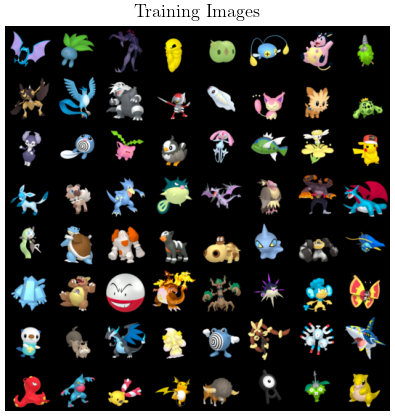

In [4]:
%matplotlib inline
dataset.plot_batch()

### Create or load GAN
Set load to True/False and specify run folder name run_name.

In [5]:
load = True
run_name = "test_run_1"

if load:
    # Load in a pretrained GAN
    gan = load_gan(run_name = run_name)
else:         
    # Create a new one   
    gan = GAN(
        latent_dim = 15*15, 

        g_hidden = config.x_dim,
        d_hidden = config.x_dim,

        generator=Generator,
        discriminator=Discriminator,
        criterion=nn.BCELoss(),

        gan_name="test_run"
    )
# Summarize the GAN
gan.test_inout()

generator dimensions: torch.Size([1, 3, 64, 64])
distriminator dimensions: torch.Size([1])



### Training time

In [6]:
# N_epochs = 1000

# gan.train(
#     dataloader = dataloader, 
#     N_epochs=N_epochs
# )

### Plot the training loss

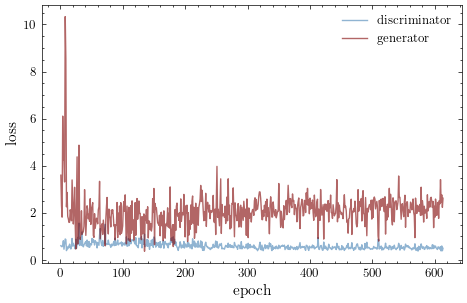

In [7]:
%matplotlib inline
gan.plot_training()

### Generated images
Let's look at some generated images and their scores

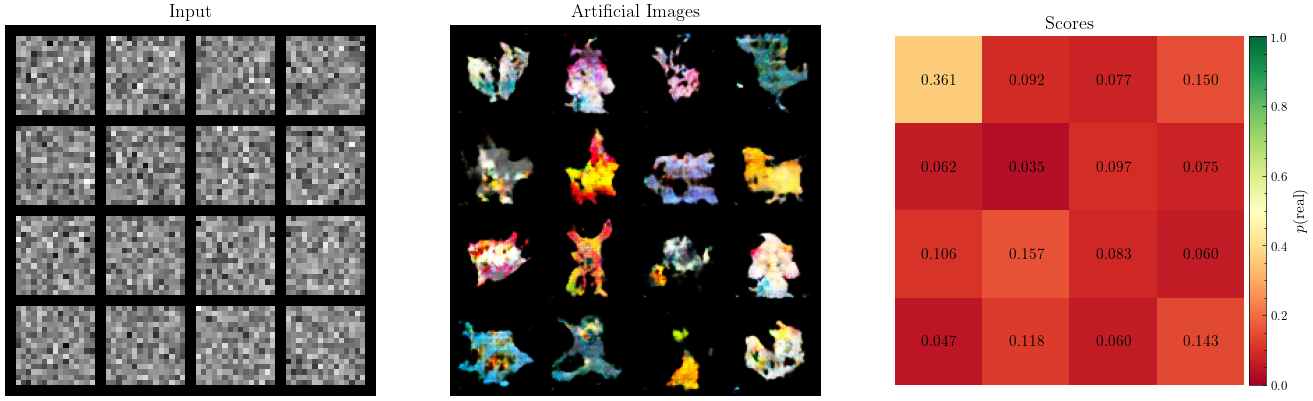

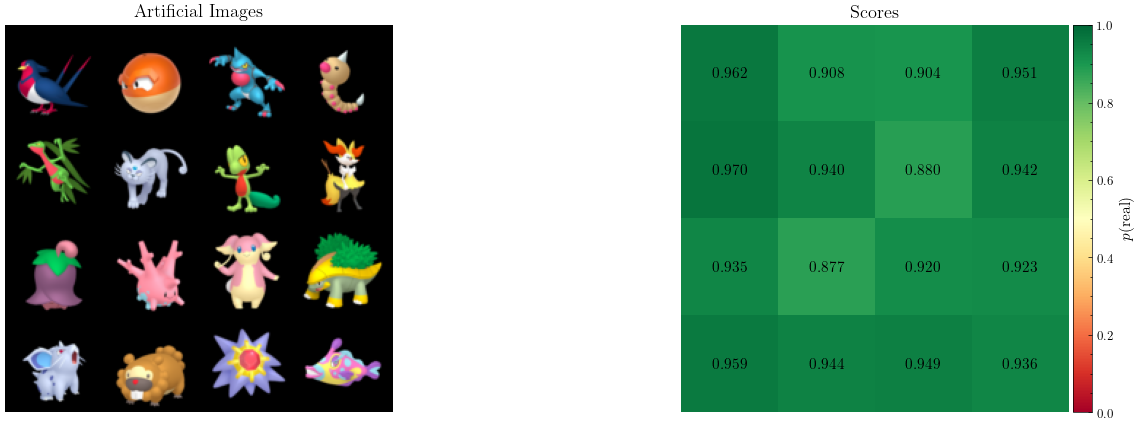

In [8]:
%matplotlib inline
nrow = 4

# Get Fakes
noises, fakes = gan.generate_fake(b_size=nrow*nrow)
scores_fakes = gan.test_fake(fakes)
# Get Reals
real_batch, _, _ = dataset.get_batch()
scores_reals = gan.test_fake(real_batch)

plot_image(
    gan,
    noises = noises,
    fakes = fakes,
    scores = scores_fakes,
    nrow = 4,
    figure_name="artificial_images"
)

plot_image(
    gan,
    noises = None,
    fakes = real_batch,
    scores = scores_reals,
    nrow = 4,
    figure_name="training_images"
)